<a href="https://colab.research.google.com/github/kimayeon-hub/DeepLearning1/blob/main/Python/Week3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 기초 문법과 판다스로 타이타닉 데이터 분석하기
- kaggle에 제출할 때 `gender_submission.csv` 파일 형태로 제출해야 함

## 1. titanic datasets을 colab 파일에 올리기
- `train.csv`와 `test.csv` 파일이 필요
- joopiter notebook 왼쪽 파일 항목을 열어둔 뒤, 필요한 파일을 드래그해서 거기에 놓으면 파일이 업로드 됨
> 여기에 업로드 된 파일들은 세션이 종료되면 사라짐

## 2. csv 파일 읽기
- csv 파일을 읽기 위해 pandas 라이브러리를 사용

In [4]:
import pandas as pd
import numpy as np  # dataframe으로 data를 변환할 때 사용
import matplotlib.pyplot as plt # dataframe으로 data를 변환시키기 전에 데이터를 그려볼 때 사용

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

## 3. train data 살펴보기

In [3]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###  탑승객의 class 분포를 살펴보기
- histogram 사용

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

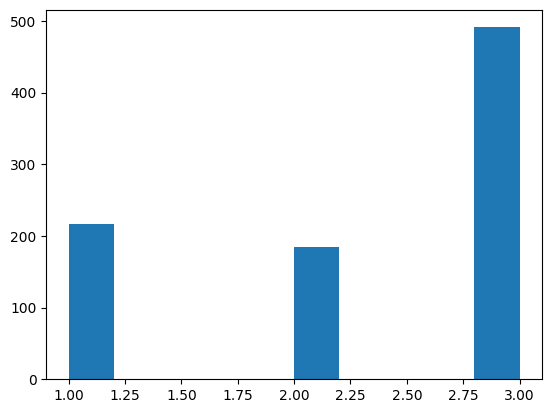

In [6]:
plt.hist(data_train['Pclass'])

### 생존자들의 정보만 보기

In [10]:
data_survived = data_train[data_train['Survived'] == 1]
data_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### class 마다 생존자들의 분포 살펴보기

(array([[216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.],
        [136.,   0.,   0.,   0.,   0.,  87.,   0.,   0.,   0., 119.]]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 2 BarContainer objects>)

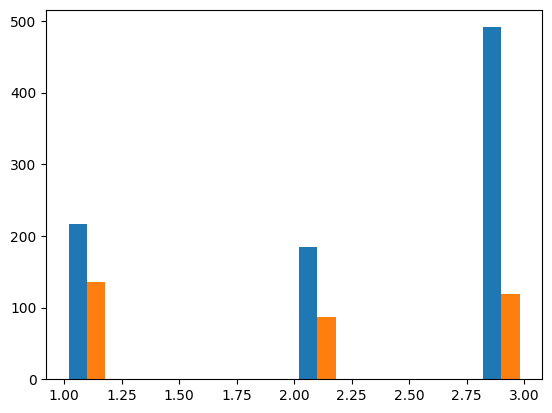

In [12]:
plt.hist([data_train['Pclass'], data_survived['Pclass']])

## 4. 데이터를 조건에 맞게 뽑아내기

### 조건: 생존자인데 남자인 경우
- (data_train['Survived'] == 1) & (data_train['Sex'] == "male")
> np.sum() 하면 조건에 만족하는 데이터의 개수를 알 수 있음
```python
np.sum((data_train['Survived'] == 1) & (data_train['Sex'] == "male"))
```

In [18]:
survived_m = data_train[(data_train['Survived'] == 1) & (data_train['Sex'] == "male")]
survived_m

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


### 조건: 생존자인데 여자인 경우

In [19]:
survived_f = data_train[(data_train['Survived'] == 1) & (data_train['Sex'] == "female")]
survived_f

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


### class별 남자 생존자와 여자 생존자의 분포 보기

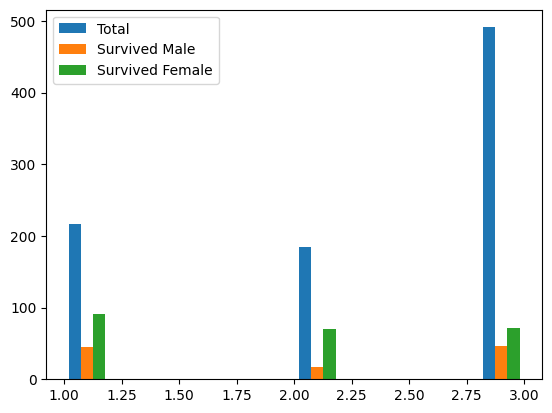

In [25]:
plt.hist([data_train['Pclass'], survived_m['Pclass'], survived_f['Pclass']])
plt.legend(['Total', 'Survived Male','Survived Female'])

### 데이터 분포를 보며 알아낸 정보
- 1등석 승객은 생존율이 높다 => 1등석 승객은 생존한다
- 2등석 승객 중 여성은 생존율이 높다 => 2등석 승객 중 여성은 생존한다
- 3등석은 대부분 사망한다 => 3등석 승객은 생존하지 못한다



## 5. 알아낸 정보에 맞게 코딩하기
- `answer`: kaggle에 제출할 정보를 저장할 변수
> answer의 초기값은 0


In [28]:
answer = np.zeros((len(data_test), 2))  # cloumn은 2개 (PassengerId, Survived 필드)
# 튜플로 값을 넘겨야 함

In [31]:
answer[:, 0] = data_test['PassengerId'] # 0번째 column은 PassengerId이므로 PassengerId 넣어주기

In [33]:
answer[:5,0]  # passengerId가 잘 들어간 것을 확인할 수 있음

array([892., 893., 894., 895., 896.])

### 규칙1: 1등석 승객은 생존한다

In [34]:
answer[data_test['Pclass'] == 1, 1] = 1 # class가 1인 사람은 1(생존)이라고 answer의 1번째 column에 넣어라는 것

In [39]:
answer[:20, :]  # 값이 잘 들어간 것을 확인할 수 있음
# 데이터를 전부 출력하면 너무 많기 때문에 잘라서 보는 것

array([[892.,   0.],
       [893.,   0.],
       [894.,   0.],
       [895.,   0.],
       [896.,   0.],
       [897.,   0.],
       [898.,   0.],
       [899.,   0.],
       [900.,   0.],
       [901.,   0.],
       [902.,   0.],
       [903.,   1.],
       [904.,   1.],
       [905.,   0.],
       [906.,   1.],
       [907.,   0.],
       [908.,   0.],
       [909.,   0.],
       [910.,   0.],
       [911.,   0.]])

### 규칙2: 2등석 승객 중 여성은 생존한다

In [40]:
answer[(data_test['Pclass']==2) & (data_test['Sex']=='female'), 1] = 1

In [42]:
answer[:30,:]

array([[892.,   0.],
       [893.,   0.],
       [894.,   0.],
       [895.,   0.],
       [896.,   0.],
       [897.,   0.],
       [898.,   0.],
       [899.,   0.],
       [900.,   0.],
       [901.,   0.],
       [902.,   0.],
       [903.,   1.],
       [904.,   1.],
       [905.,   0.],
       [906.,   1.],
       [907.,   1.],
       [908.,   0.],
       [909.,   0.],
       [910.,   0.],
       [911.,   0.],
       [912.,   1.],
       [913.,   0.],
       [914.,   1.],
       [915.,   1.],
       [916.,   1.],
       [917.,   0.],
       [918.,   1.],
       [919.,   0.],
       [920.,   1.],
       [921.,   0.]])

## 6. answer을 csv파일로 저장하기

### 값들을 int 타입으로 변환하기

In [43]:
answer = answer.astype('int32')

In [45]:
answer[:20, :]

array([[892,   0],
       [893,   0],
       [894,   0],
       [895,   0],
       [896,   0],
       [897,   0],
       [898,   0],
       [899,   0],
       [900,   0],
       [901,   0],
       [902,   0],
       [903,   1],
       [904,   1],
       [905,   0],
       [906,   1],
       [907,   1],
       [908,   0],
       [909,   0],
       [910,   0],
       [911,   0]], dtype=int32)

### data_train을 dataframe 형태로 변환하기
- 데이터를 쉽게 다루려면 numpy 형태가 편함


In [46]:
df_answer = pd.DataFrame(answer)

In [47]:
df_answer

,0,1
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### column 제목 수정하기

In [48]:
df_answer.columns = ['PassengerId', 'Survived']

In [49]:
df_answer

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### csv로 저장하기

In [50]:
df_answer.to_csv('answer.csv', index=False) # dataframe에 있는 index도 저장할 것이냐 말 것이냐

### 파일 > answer.csv 다운로드 받아서 Kaggle에 제출하면 됨
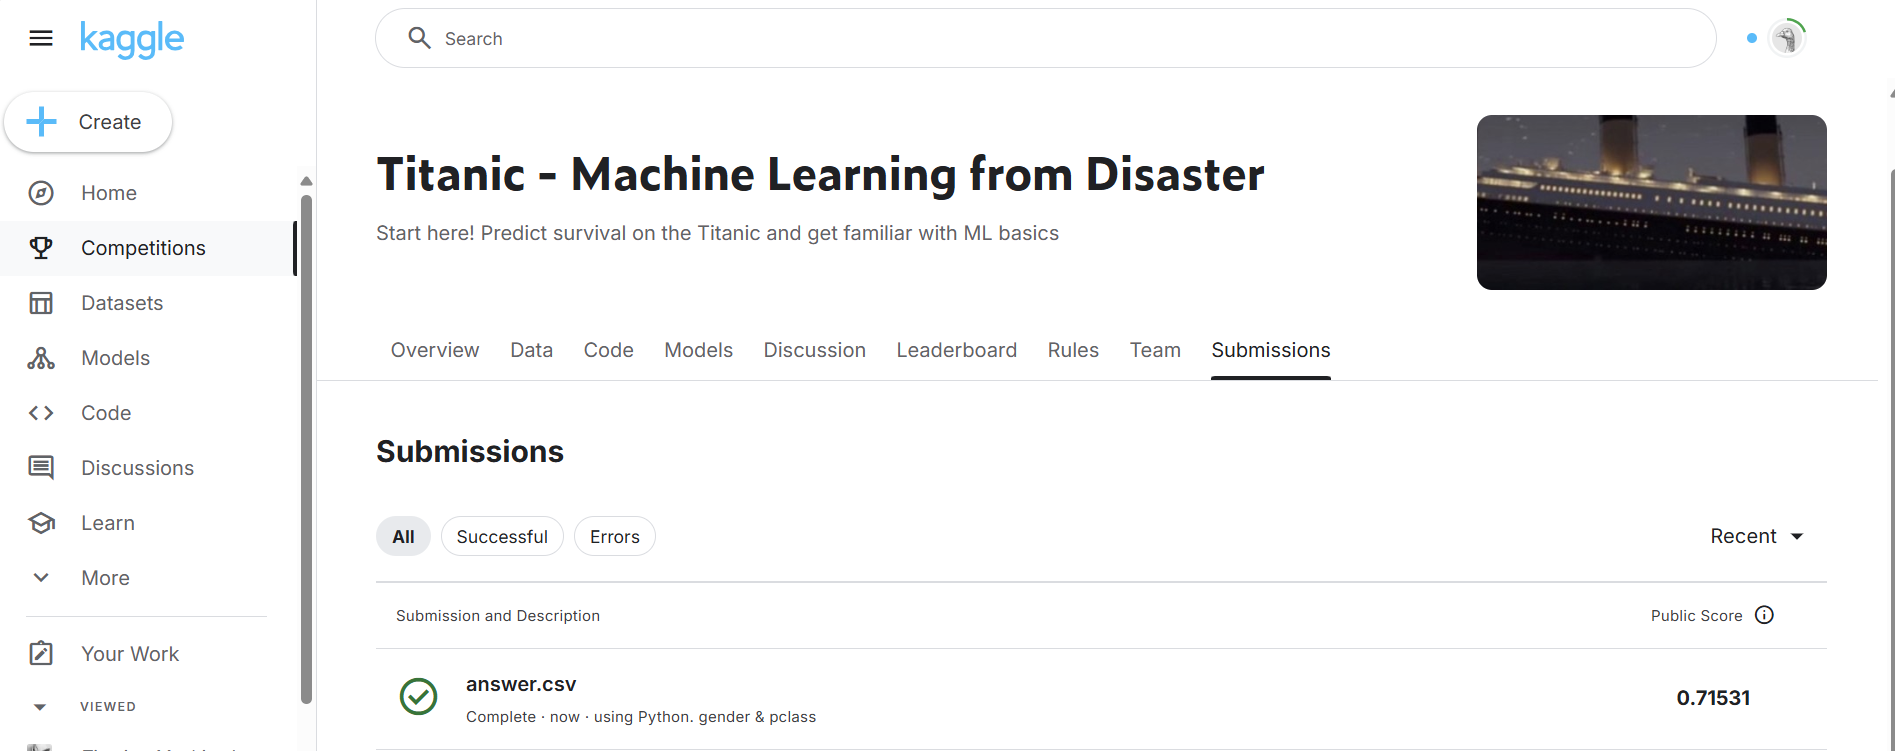